In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

DATA_DIR = "../datasets"
EPL_TRAINING_DATA_CSV = DATA_DIR + "/epl-training.csv"
EPL_TEST_DATA_CSV = DATA_DIR + "/epl-test.csv"


# Read the CSV file
epl_training_df = pd.read_csv(EPL_TRAINING_DATA_CSV)
epl_test_df = pd.read_csv(EPL_TEST_DATA_CSV)

epl_training_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,29/10/2023,West Ham,Everton,0.0,1.0,A,0.0,0.0,D,S Attwell,...,2.0,4.0,4.0,3.0,7.0,11.0,4.0,1.0,0.0,0.0
8837,29/10/2023,Aston Villa,Luton,3.0,1.0,H,1.0,0.0,H,J Brooks,...,6.0,1.0,6.0,4.0,11.0,10.0,3.0,2.0,0.0,0.0
8838,29/10/2023,Brighton,Fulham,1.0,1.0,D,1.0,0.0,H,M Salisbury,...,7.0,5.0,7.0,3.0,12.0,8.0,0.0,3.0,0.0,0.0
8839,29/10/2023,Liverpool,Nott'm Forest,3.0,0.0,H,2.0,0.0,H,C Salisbury,...,8.0,1.0,8.0,3.0,9.0,13.0,2.0,3.0,0.0,0.0


In [2]:
epl_training_df['FTR'].value_counts()

FTR
H    4063
A    2584
D    2193
Name: count, dtype: int64

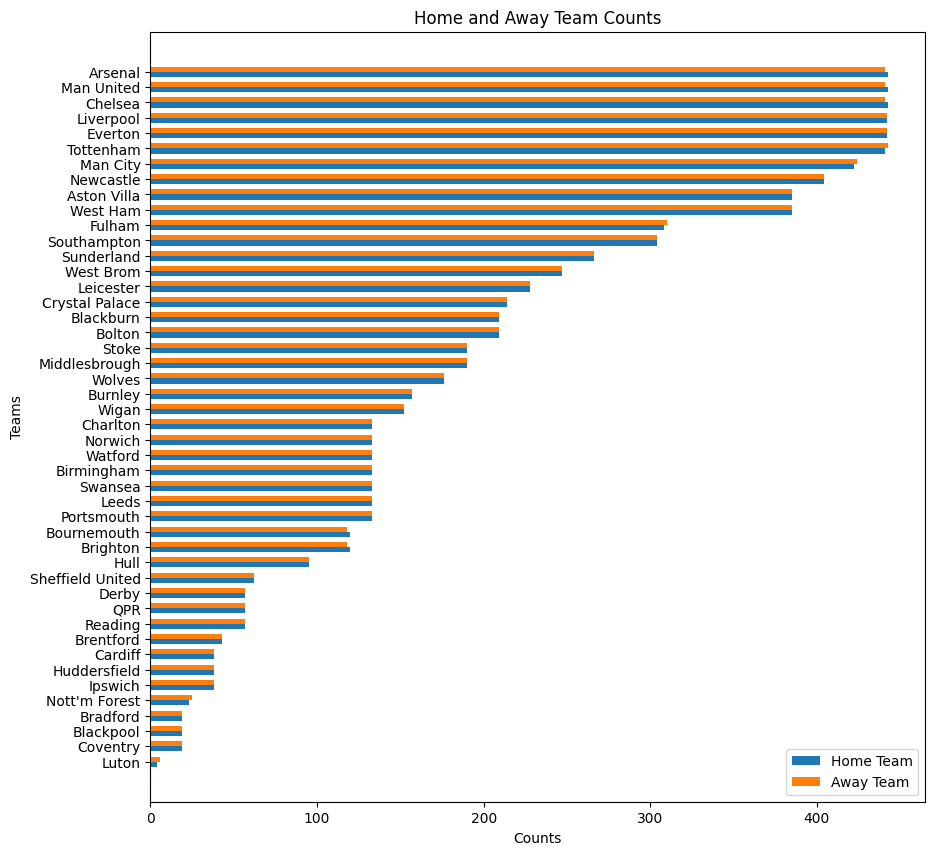

In [50]:
home_team_counts = epl_training_df['HomeTeam'].value_counts()

# Count unique values in the AwayTeam column
away_team_counts = epl_training_df['AwayTeam'].value_counts()
# Create a DataFrame from the counts
team_counts = pd.DataFrame({'HomeTeam': home_team_counts, 'AwayTeam': away_team_counts}).fillna(0)
team_counts = team_counts.sort_values(by='HomeTeam', ascending=True)
# Plotting
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

# Adjust the bar width and the spacing between the bars
bar_width = 0.4
space_between_bars = 0.2
index = np.arange(len(team_counts)) * (bar_width + space_between_bars) * 2

# Plot both 'HomeTeam' and 'AwayTeam' counts
bars1 = ax.barh(index - bar_width/2, team_counts['HomeTeam'], bar_width, label='Home Team')
bars2 = ax.barh(index + bar_width/2, team_counts['AwayTeam'], bar_width, label='Away Team')

# Adding labels and title
ax.set_ylabel('Teams')
ax.set_xlabel('Counts')
ax.set_title('Home and Away Team Counts')
ax.set_yticks(index)
ax.set_yticklabels(team_counts.index)
ax.legend()

# Show the plot
plt.show()


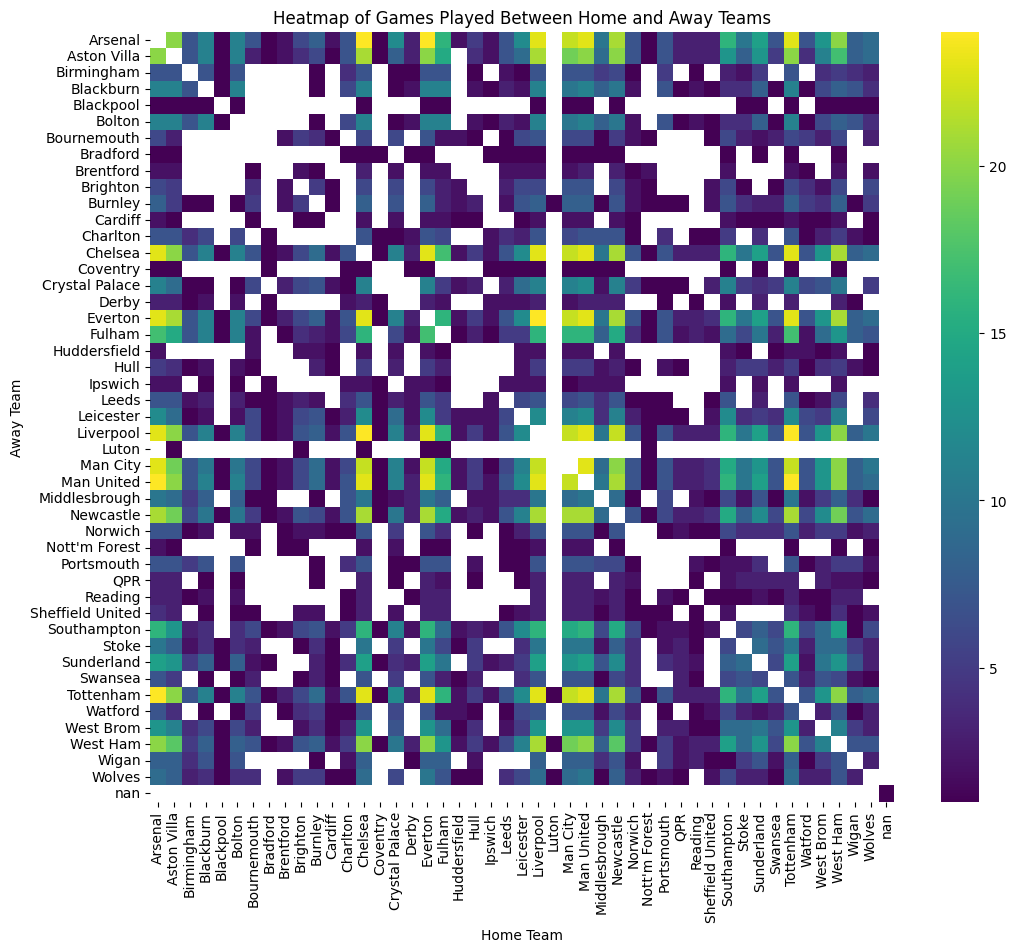

In [51]:
# Assuming df is your DataFrame and it has columns 'HomeTeam', 'AwayTeam'

# Handle NaN values or convert all team names to strings
df = epl_training_df  # Assign to a shorter variable for convenience

df['HomeTeam'] = df['HomeTeam'].astype(str)
df['AwayTeam'] = df['AwayTeam'].astype(str)

# Create a new column for counting each game - assuming each row is a game
df['GameCount'] = 1

# Create a pivot table
pivot_table = df.pivot_table(index='AwayTeam', columns='HomeTeam', values='GameCount', aggfunc='sum')

# Ensure all teams are included in both axes
all_teams = sorted(set(df['HomeTeam']).union(set(df['AwayTeam'])))
pivot_table = pivot_table.reindex(index=all_teams, columns=all_teams, fill_value=0)

# Creating the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed
sns.heatmap(pivot_table, cmap="viridis", annot=False)  # Set annot to False

# Adding labels and title
plt.title('Heatmap of Games Played Between Home and Away Teams')
plt.xlabel('Home Team')
plt.ylabel('Away Team')

# Show the plot
plt.show()


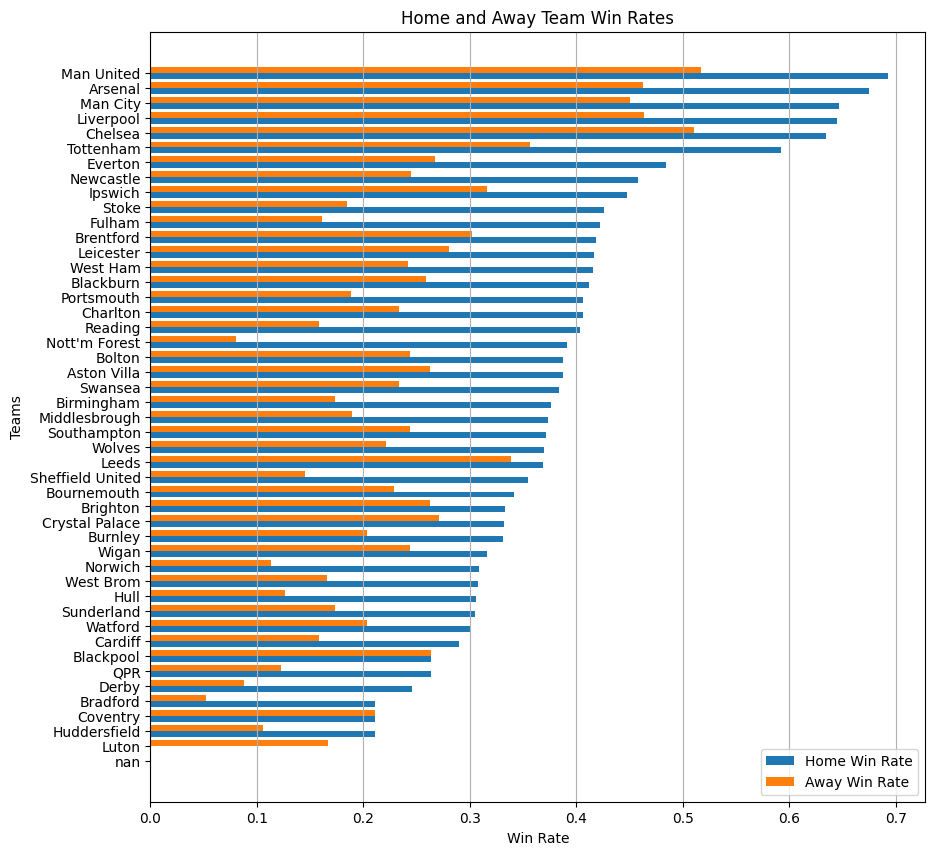

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming epl_training_df is your DataFrame and it has columns 'HomeTeam', 'AwayTeam', 'FTR'

df = epl_training_df  # Assign to a shorter variable for convenience

# Calculate home wins and total home games
home_wins = df[df['FTR'] == 'H'].groupby('HomeTeam').size()
total_home_games = df.groupby('HomeTeam').size()

# Calculate away wins and total away games
away_wins = df[df['FTR'] == 'A'].groupby('AwayTeam').size()
total_away_games = df.groupby('AwayTeam').size()

# Calculate win rates
home_win_rate = home_wins / total_home_games
away_win_rate = away_wins / total_away_games

# Combine into a DataFrame and fill NaN values
win_rates = pd.DataFrame({'HomeWinRate': home_win_rate, 'AwayWinRate': away_win_rate}).fillna(0)

# Sort the DataFrame by HomeWinRate for better visualization
win_rates = win_rates.sort_values(by='HomeWinRate', ascending=True)

# Plotting
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# Bar settings
bar_width = 0.4
index = np.arange(len(win_rates))

# Plot home and away win rates
bars1 = ax.barh(index - bar_width/2, win_rates['HomeWinRate'], bar_width, label='Home Win Rate')
bars2 = ax.barh(index + bar_width/2, win_rates['AwayWinRate'], bar_width, label='Away Win Rate')

# Adding labels, title, and legend
ax.set_ylabel('Teams')
ax.set_xlabel('Win Rate')
ax.set_title('Home and Away Team Win Rates')
ax.set_yticks(index)
ax.set_yticklabels(win_rates.index)

ax.legend(loc='lower right')
# Adding vertical grid lines
ax.xaxis.grid(True)

# Show the plot
plt.show()
